# Basic Image Classification with Tensor Flow

Creating and train a model that takes an image of a handwritten digit as input and predicts the class of that image.

## TASK 1:Importing the required libraries

In [15]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## TASK 2: DataSet

In [16]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

**Checking the shape of the imported arrary**

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

There are 60000 el

**Plotting an image example to understand better**

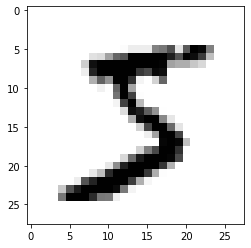

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0].astype('uint8'), cmap='binary')
plt.show()

**Displaying labels**

In [19]:
print(y_train[0])
#to know the distinct elements of distinct elements
print(set(y_train))

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## TASK 3: One Hot Encoding

In this, each and every label-> [ ] with 10 elements at the index corresponding to that class will be set to 1 and other will be set to 0. 
For example: 5 -> [0 0 0 0 0 1 0 0 0 0]

Labels are encoded so that our neural network to know which switch is on for the given class

In [20]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [21]:
y_train_encoded.shape

(60000, 10)

In [22]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Neural Networks

Linear equations
General equation - y=w1x1 + w2x2 + w3x3 + b
V.E -> Y = WX + b ; W = [w1 w2 w3] X=[x1,
                                      x2,
                                      x3]
For the given values of X and Y, an algorithm should be able to find or give an optimal value for W and b (which best fits tha algorithm)and note the absolute value

**Neural network- layered architecture**

hidden layer is located between input and output layer of the algorithm; In hidden layer function applies weight to the inputs and directs them through activation function as the output "performs non-linear transformations of the inputs entered into the network".

1.Input is fed to the input layer, the neurons performs a linear transformation using the weights and biases
     X = (weight * input)+bias
2.An activation function is applied to the above result
     Y = Activation(X)
3.Finally the output from the activation function moves to the next hidden layer and the same process is repeated.
This forward movement of info is known as forward propogation.

## TASK 5: Preprocessing the examples

there 60000 elements each of 28x28 pixels = 784
784 - dimensonal vectors [input]
10 - dimensonal vectors as there as 10 indivual classes [0-9] output

In [23]:
import numpy as np
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

#displaying the pixels
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


**Normalizing the data**

Data is normalized for better and effective computation

In [24]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10 #epsilon is a constant here which is used to remove any case of instability if x_std is very small
x_train_norm = (x_train_reshaped - x_mean )/(x_std + epsilon)

print(x_train_norm)

[[-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 ...
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]
 [-0.42407389 -0.42407389 -0.42407389 ... -0.42407389 -0.42407389
  -0.42407389]]


In [30]:
x1_mean = np.mean(x_test_reshaped)
x1_std = np.std(x_test_reshaped)
epsilon = 1e-10 #epsilon is a constant here which is used to remove any case of instability if x_std is very small
x_test_norm = (x_test_reshaped - x1_mean )/(x1_std + epsilon)

## TASK 6: Creating a model

**import the sequential class**

In [25]:
from tensorflow.keras.models import Sequential #this library creates model layer by layer
from tensorflow.keras.layers import Dense #Dense implements the operation

In [26]:
model = Sequential([
    Dense(128, activation='relu',input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

output = activation(dot(input,kernel(I.E weight matrix)+bias)

**bias_vector ->** additional set of weights in a neutral network that requires no and this corresponds to the output of an artifical neural network when it has zero input 
without a bias node, no layer would be able to produce an output for the next layer that differs from 0.

**relu ->** for all positive values given as a output by the linear function it sets to 1 and for negative values, it sets to 0.

**softmax ->** gives us the probability score for various nodes(which sums upto 1) the class with highest probability is the one that gives our predictions

## TASK 7: Compiling and Training our model

In [27]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary() #displays the architecture of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


The optimizer controls the learning rate. 
The learning rate determines how fast the optimal weights for the model are calculated.

**Training the model**

In [28]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 18s 294us/sample - loss: 0.3566 - acc: 0.8973
Epoch 2/3
60000/60000 [==============================] - 16s 260us/sample - loss: 0.1794 - acc: 0.9484
Epoch 3/3
60000/60000 [==============================] - 15s 244us/sample - loss: 0.1358 - acc: 0.9610


**Evaluating the model**

In [31]:
loss,accuracy = model.evaluate(x_test_norm,y_test_encoded)
print(accuracy,100)

10000/10000 [==============================] - 2s 228us/sample - loss: 0.1231 - acc: 0.9628
0.9628 100


## TASK 8: Predictions

In [34]:
preds = model.predict(x_test_norm)



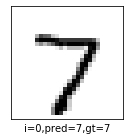

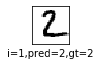

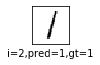

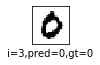

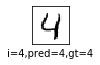

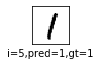

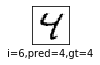

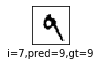

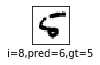

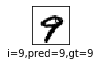

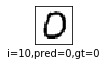

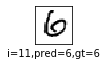

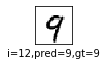

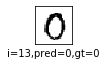

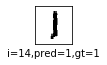

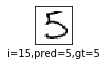

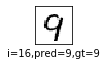

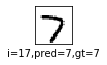

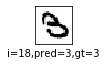

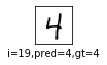

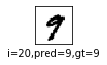

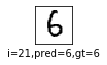

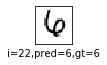

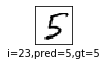

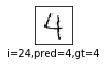

In [36]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    
    col='g'
    if pred != gt:
        col = 'r'
        
    
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt))
    plt.imshow(x_test[start_index+i],cmap='binary')
    plt.show()
    


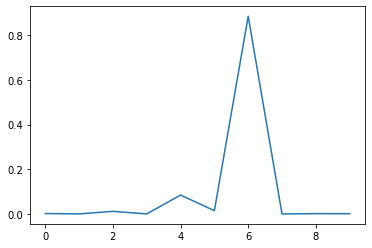

In [33]:
    plt.plot(preds[8])